# Example de fiche Jupyter
## Introduction
Cette fiche présente les différentes possibilités offertes par les notebooks Jupyter et l'API du module Python "trustutils" pour réaliser des fiches de validation.
Pour fonctionner correctement, les notebooks nécessitent un environnement particulier décrit dans le fichier README à la racine des fiches Jupyter dans TRUST.

## Fonctions de présentation

Voici quelques méthodes utiles pour créer des fiches de validation. Cependant si vous voulez personaliser vos fiches de validation, vous pouvez vous aider de ces links pour les créer:

* https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd un lien qui explique bien la synth&axe markdown
* https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#entire-books-or-other-large-collections-of-notebooks-on-a-topic une liste exaustive d'exemples de notebook.

In [1]:
from trustutils.jupyter import run

run.Introduction("Funky Francis")
run.Description("Some description of the case here")
run.Parameters_TRUST()

## Introduction 
 Validation made by : Funky Francis
 
 Report generated 21/06/2021

### Description 
Some description of the case here

### Parameters TRUST 
 * Version TRUST:
 Binary:Binary

## Fontion Jupyter-Run

In [2]:
from trustutils.jupyter import run

# Ici on ajoute un cas qu'on veut lancer, en specifiant le nombre de proceseurs qu'on veut (valeur par defau=1)
##casT=run.addCase(".","grad_u_transpose_3d.data",nbProcs=1)

# Methodes pour copier simplement
casT=run.addCase(".","Loi_Fermeture_Test.data",nbProcs=1)
casS=casT.copy()
# Remarque: On peut utiliser les options pour mieux gerer l'arborescence des fichiers dans le build
casC=casT.copy("Dosier","Loi_Fermeture_Test.data","NouveauNom.data")

# Methodes pour substituer un morceau de code
casC.substitute("Mailler dom\n","Mailler dom\n")

# Example de cas ou il n'y a pas le mot cherche
#casC.substitute("Mailler Rom","Mailler dom")

# Ici un exemple de comment on peut creer une arborescence dans le dossier build et changer le nom du JDD
cas=run.addCase("./MAIS/OU/EST/DONC/OR/NI/CAR","Loi_Fermeture_Test.data","NouveauNom.data")
# On peut aussi ajouter un autre fichier, cela est tres utile quand on sauvegarde le mesh dans un fichier separe
cas.addfile("Loi_Fermeture_Test.data")

# Methode pour lancer les cas tests
run.runCases()
# L'option verbose permet d'afficher la sortie de TRUST
# Ce qui n'est en general pas voulu car cela est deja dans le terminal
#run.runCases(verbose=True)

# Remarque sans ecrire list_Trust_user_word cela ne marche pas 
run.dumpData("Loi_Fermeture_Test.data",list_Trust_user_word=["dom"])

/export/home/adrien/Projets/TRUST/TRUST_LOCAL/Validation/Rapports_automatiques/jupyter/SampleForm/build/Dosier
@@@@@@@ Commande: trust Loi_Fermeture_Test.data 1 2>Loi_Fermeture_Test.err 1>Loi_Fermeture_Test.out
@@@@@@@ Commande: trust Copy_Loi_Fermeture_Test.data 1 2>Copy_Loi_Fermeture_Test.err 1>Copy_Loi_Fermeture_Test.out
@@@@@@@ Commande: trust NouveauNom.data 1 2>NouveauNom.err 1>NouveauNom.out
@@@@@@@ Commande: trust NouveauNom.data 1 2>NouveauNom.err 1>NouveauNom.out
 # Conduction 2D : Diverses conditions limites thermiques #
  # PARALLEL OK 8 #
  dimension  2
 
 Pb_conduction pb
 Domaine dom 
 # BEGIN MESH #
  Mailler dom 
 {
 	 Pave Cavite 
  	 {
 	 	 Origine  0. 0.
 	 	 Nombre_de_Noeuds 3 3
 	 	 Longueurs 1. 1.
 	 }
 	 {
 	 	 Bord Haut X =  0. 0. <=  Y <=  1.
 	 	 Bord Haut   Y =  1. 0. <=  X <=  1.
 	 	 Bord Haut    Y =  0. 0. <=  X <=  1.
 	 	 Bord Haut  X =  1. 0. <=  Y <=  1.
 	 }
 } 
 
 
 # END MESH #
  # BEGIN PARTITION
  Partition  dom 
 {
 	 Partition _tool  tranche  {

In [3]:
# Methodes pour afficher le tableau de performance
run.tablePerf()

,host,system,Total CPU Time,CPU time/step,number of cell
./Loi_Fermeture_Test,is154527.intra.cea.fr,Linux,0.059976,0.002286,4
Copy_Loi_Fermeture_Test.data/Copy_Loi_Fermeture_Test,is154527.intra.cea.fr,Linux,0.05879,0.002221,4
Dosier/NouveauNom,is154527.intra.cea.fr,Linux,0.063994,0.002112,4
./MAIS/OU/EST/DONC/OR/NI/CAR/NouveauNom,is154527.intra.cea.fr,Linux,0.058812,0.002075,4


In [4]:
# Methodes qui retourne le nom du 1er cas test lance
run.dumpList()[0].name_

'Loi_Fermeture_Test.data'

## Fontion Jupyter-Plot
Jupyter-Plot est une librairie dans le but d'afficher des courbes et autres graphiques à partir des fichiers sondes de TRUST. 

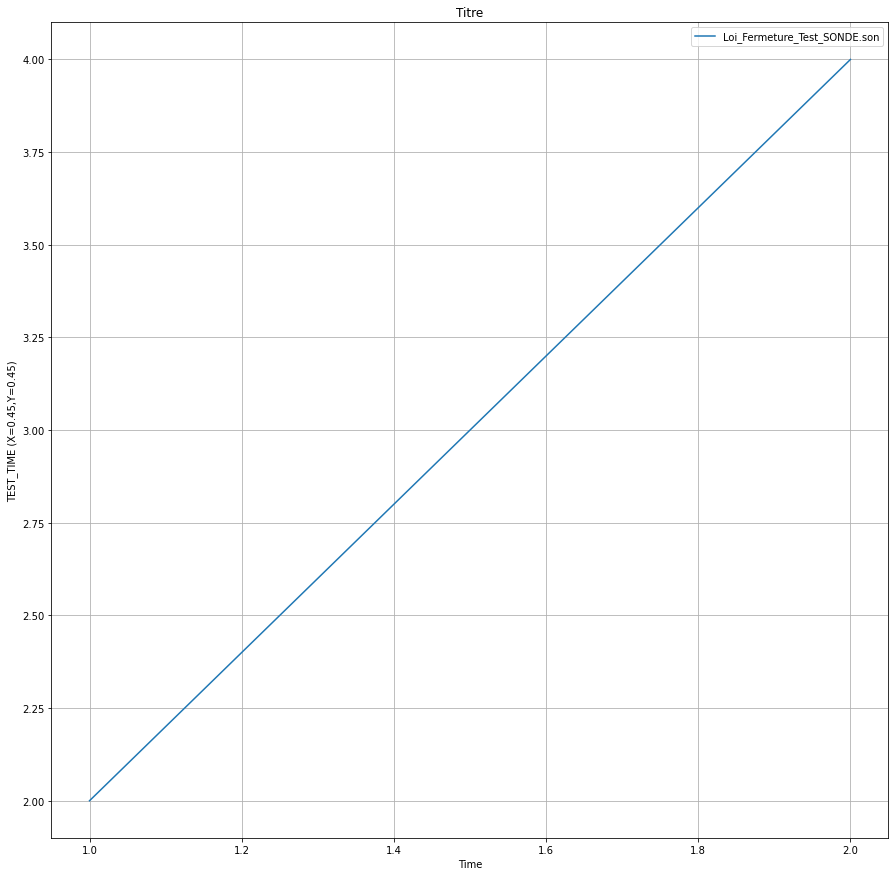

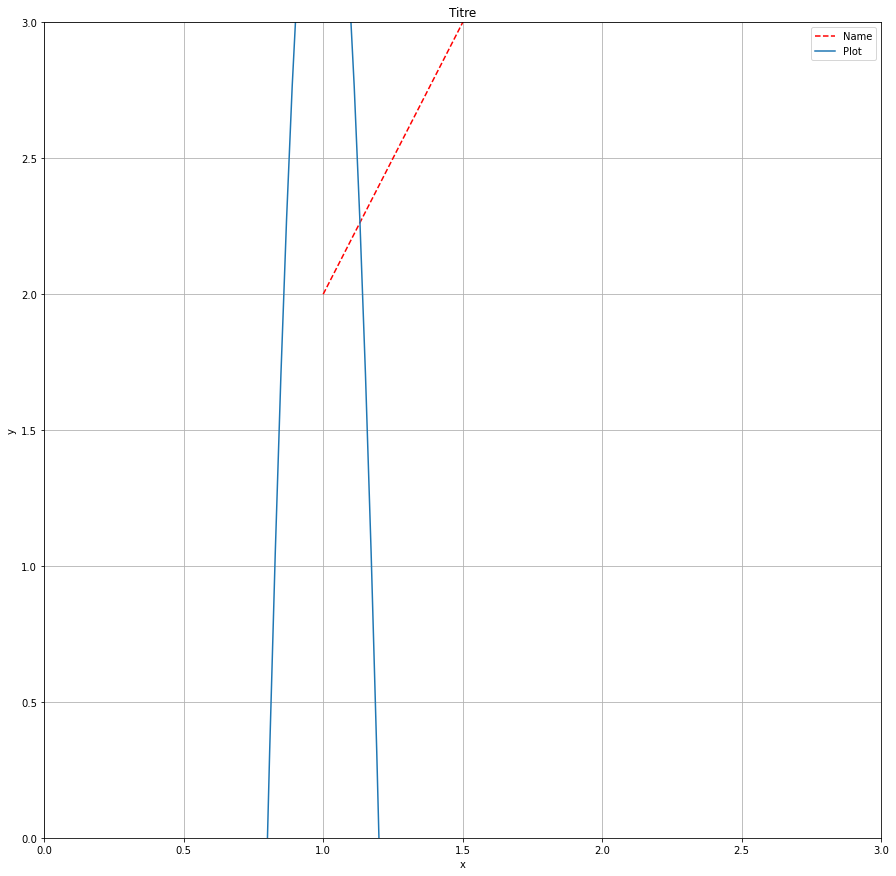

In [5]:
from trustutils.jupyter import plot
import matplotlib.pyplot as plt
import numpy as np

# Graphe simple
Graph=plot.Graph("Titre")
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")

# Graphe plus complexe
Graph=plot.Graph("Titre")
Graph.addPoint("Loi_Fermeture_Test_SONDE.son",label="Name",color="r",marker="--")

# Methodes pour ajouter des courbes 
x=np.linspace(0,2,100)
y=-100*(x-1)*(x-1)+4
plt.plot(x,y,label="Plot")

# Methode pour changer les titres des axes.
Graph.label("x","y")
# Methode pour cadrer le plot.
# Tous les parametres ne sont pas obligatoires:
Graph.visu(xmin=0,xmax=3,ymin=0,ymax=3)

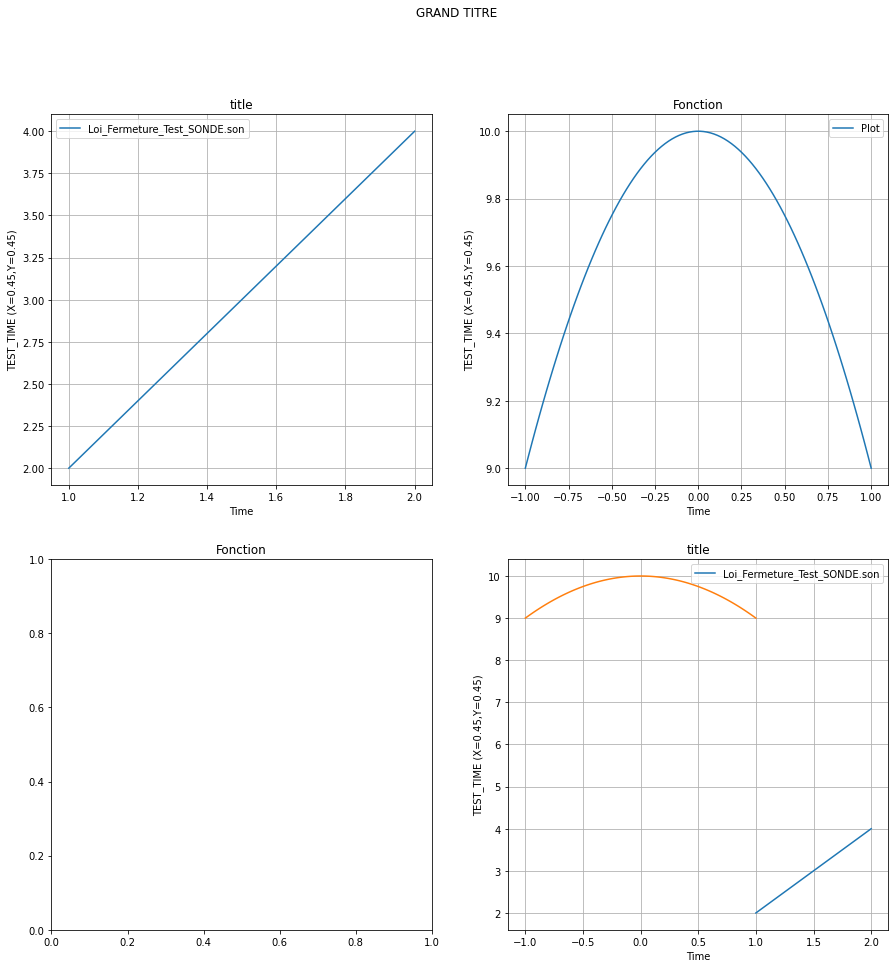

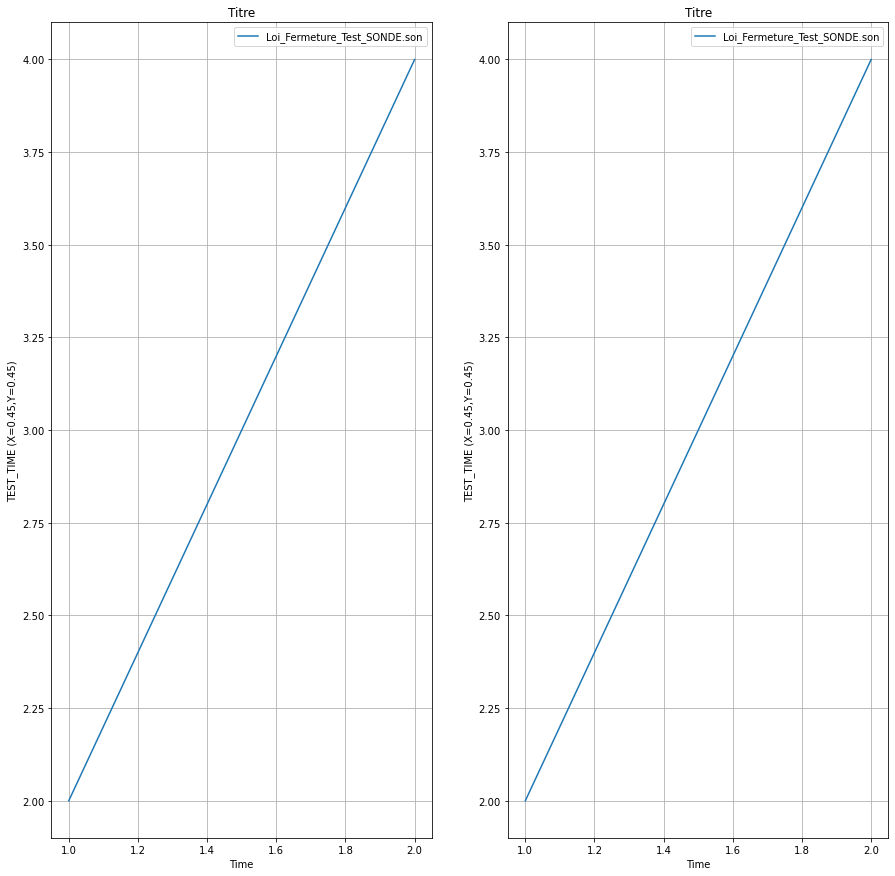

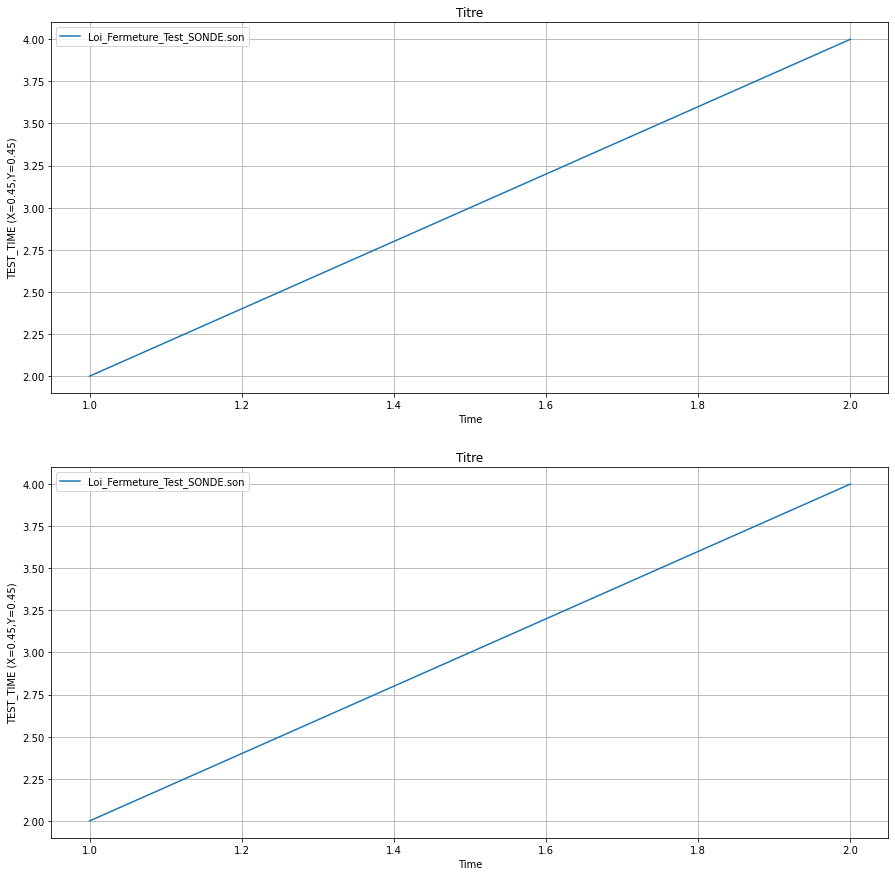

In [6]:
from trustutils.jupyter import plot
import matplotlib.pyplot as plt
import numpy as np 

# Multiplot carre
Graph=plot.Graph(title="title",subtitle="GRAND TITRE",nX=2,nY=2)
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")
Graph.addPlot([1,1])
Graph.addPoint("Loi_Fermeture_Test_SONDE.son") 
Graph.addPlot([1,0])

# Remarque: pour ajouter une courbe il faut utiliser la methode 
# "add" obligatoirement. Si on veut charger un fichier semblable
# a une fichier texte, on peut se servir de la methode 
# de numpy nommee numpy.loadtxt("direction_du_fichier.txt")
x=np.linspace(-1,1,100)
y=-x*x+10
plt.plot(x,y,label="Plot")
Graph.add(x,y,[0,1],label="Plot",title="Fonction")


Graph.addPlot([1,0])

# Multiplot horizontal
Graph=plot.Graph("Titre",nX=1,nY=2) # nX=1 est la valeur par defaut -- peut etre omise
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")
Graph.addPlot(1)
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")

# Multiplot vertical
Graph=plot.Graph("Titre",nX=2,nY=1)
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")
Graph.addPlot(1)
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")


## Fontion Jupyter-Widget
Jupyter-Widget est une librairie qui permet de créer un widget interfactif dans le notebook.

interactive(children=(Text(value='./grad_u_transpose_3d.lata', description='name'), Text(value='Pseudocolor', …

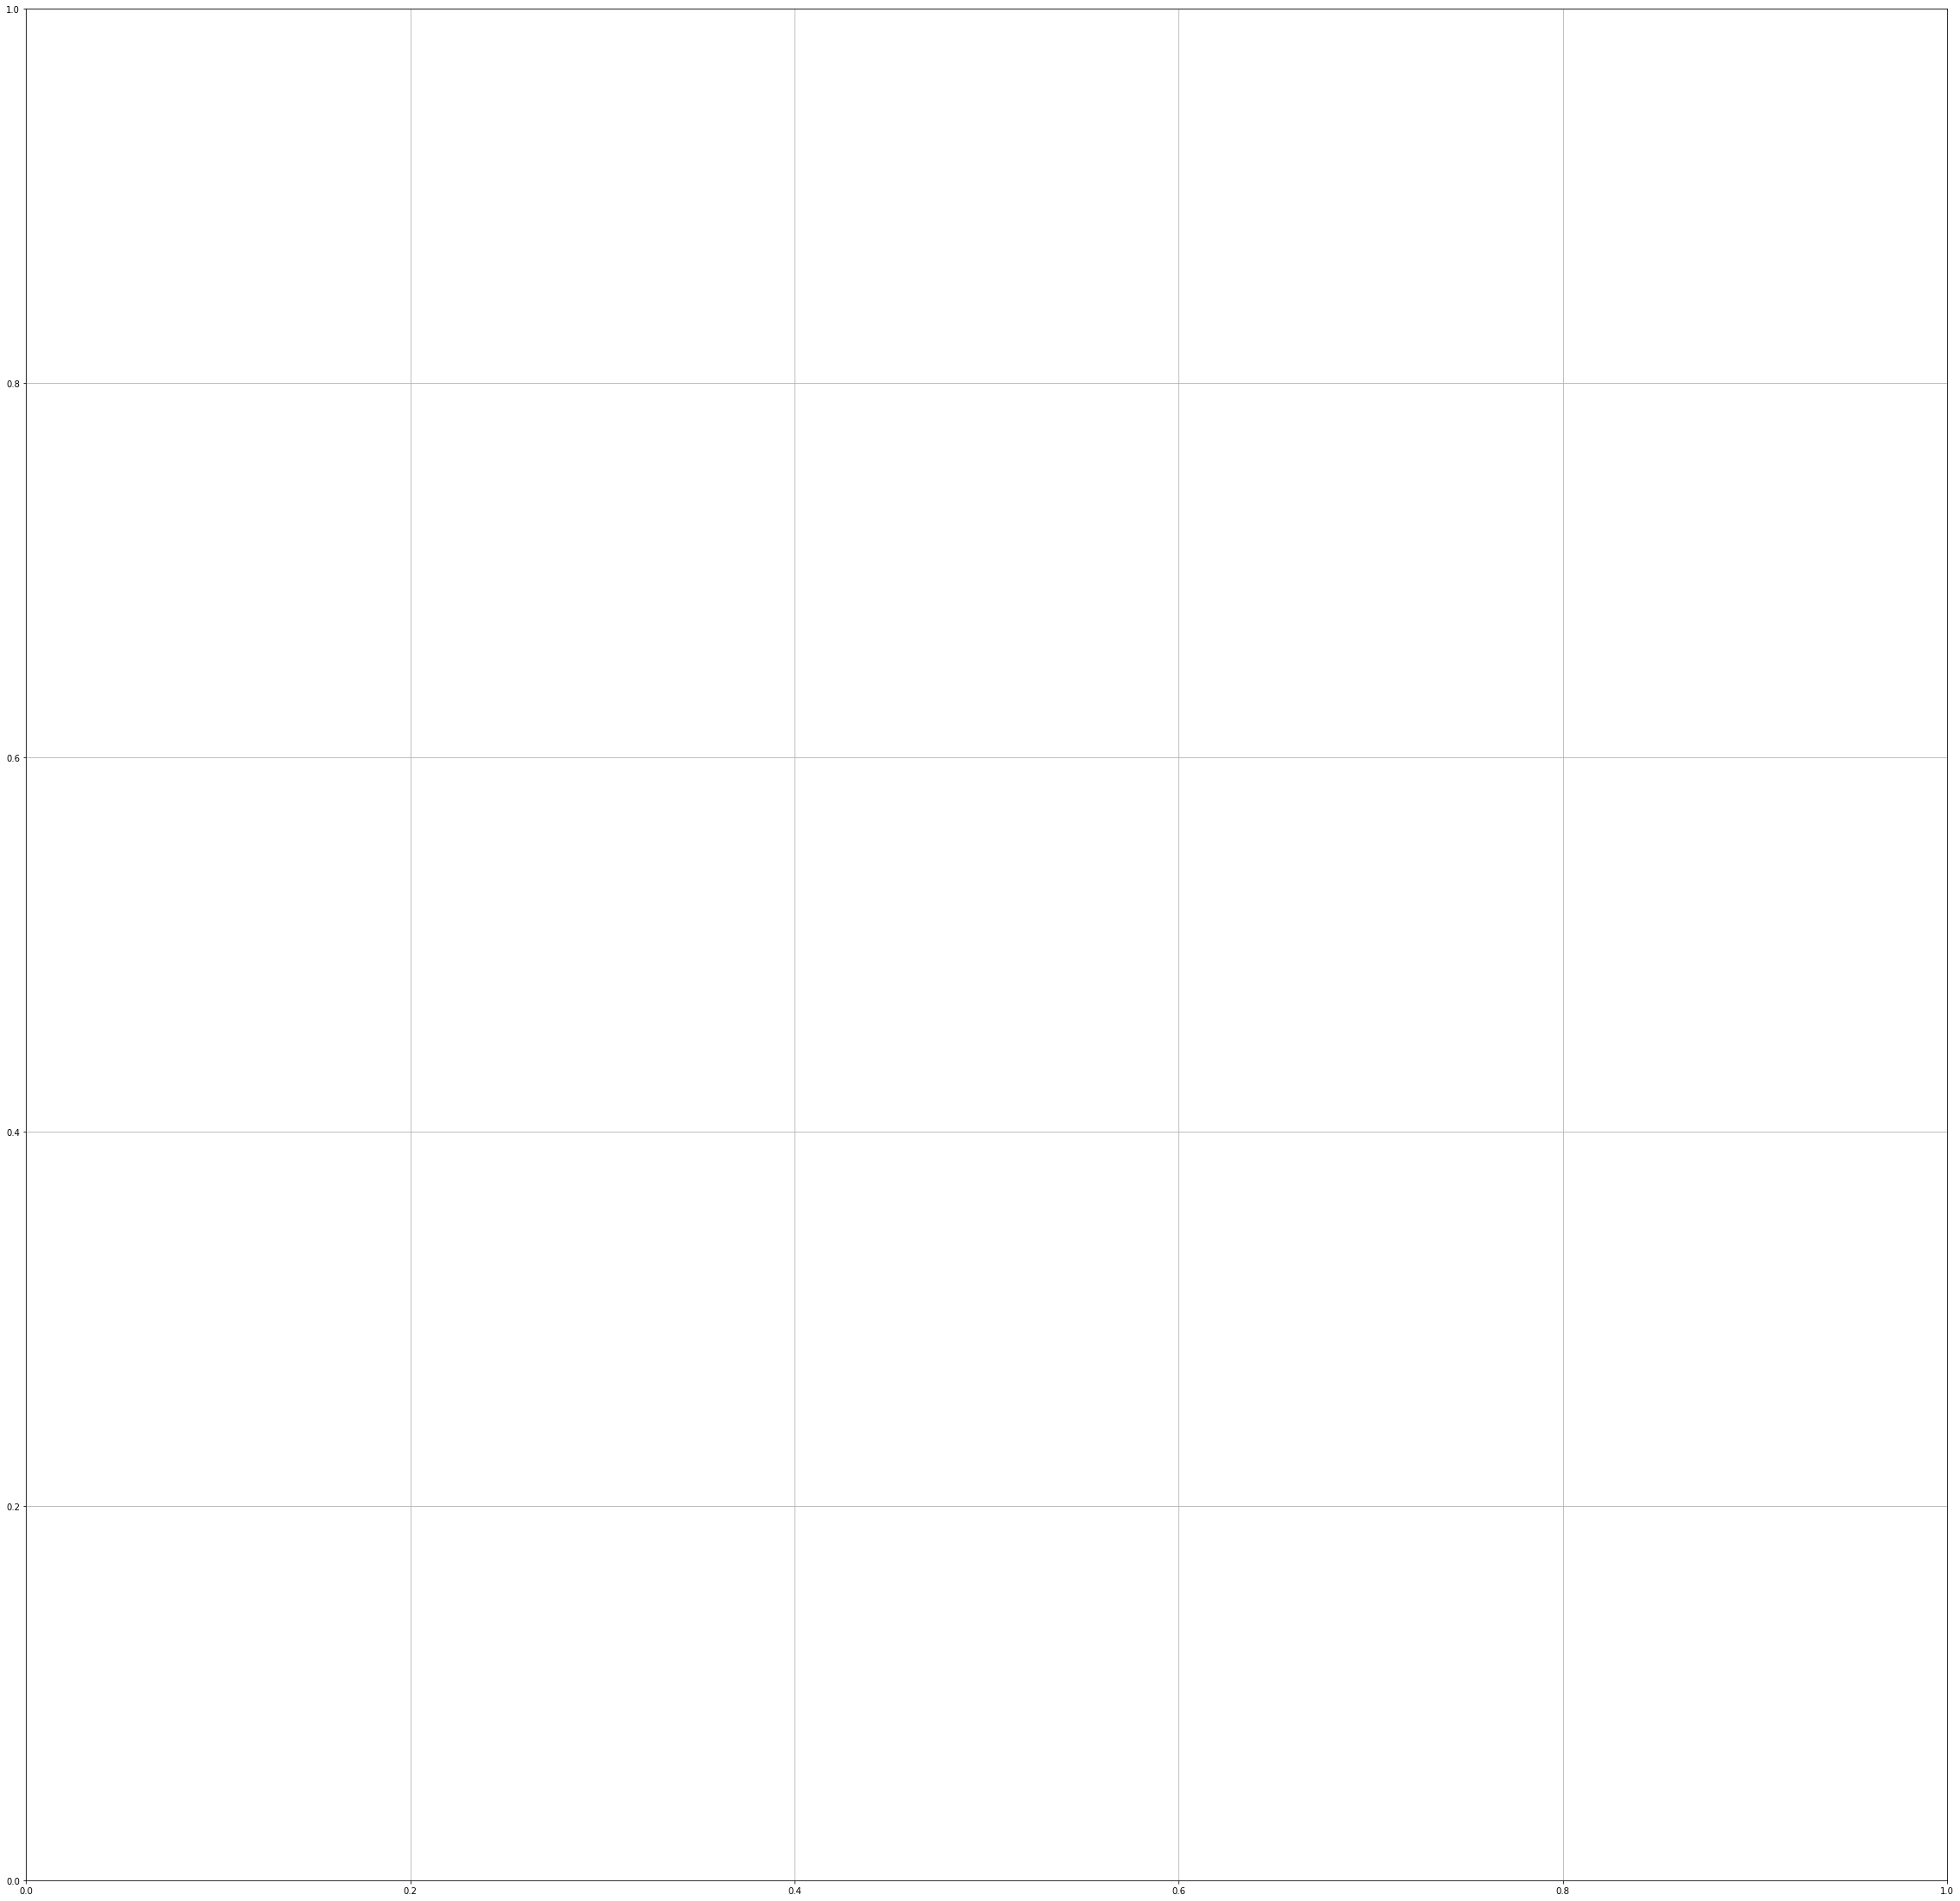

In [7]:
from trustutils.jupyter import widget
# Version alpha
widget.interface("./grad_u_transpose_3d.lata","Pseudocolor","PRESSION_PA_ELEM_dom") 

In [8]:
from trustutils.jupyter import widget
# Version compacte
widget.Inter("./grad_u_transpose_3d.lata","Pseudocolor","PRESSION_PA_ELEM_dom") 

## Fontion visitutils
Visit utils est une librairie dont le but est d'aider l'utilisateur à obtenir des plot VisIt.

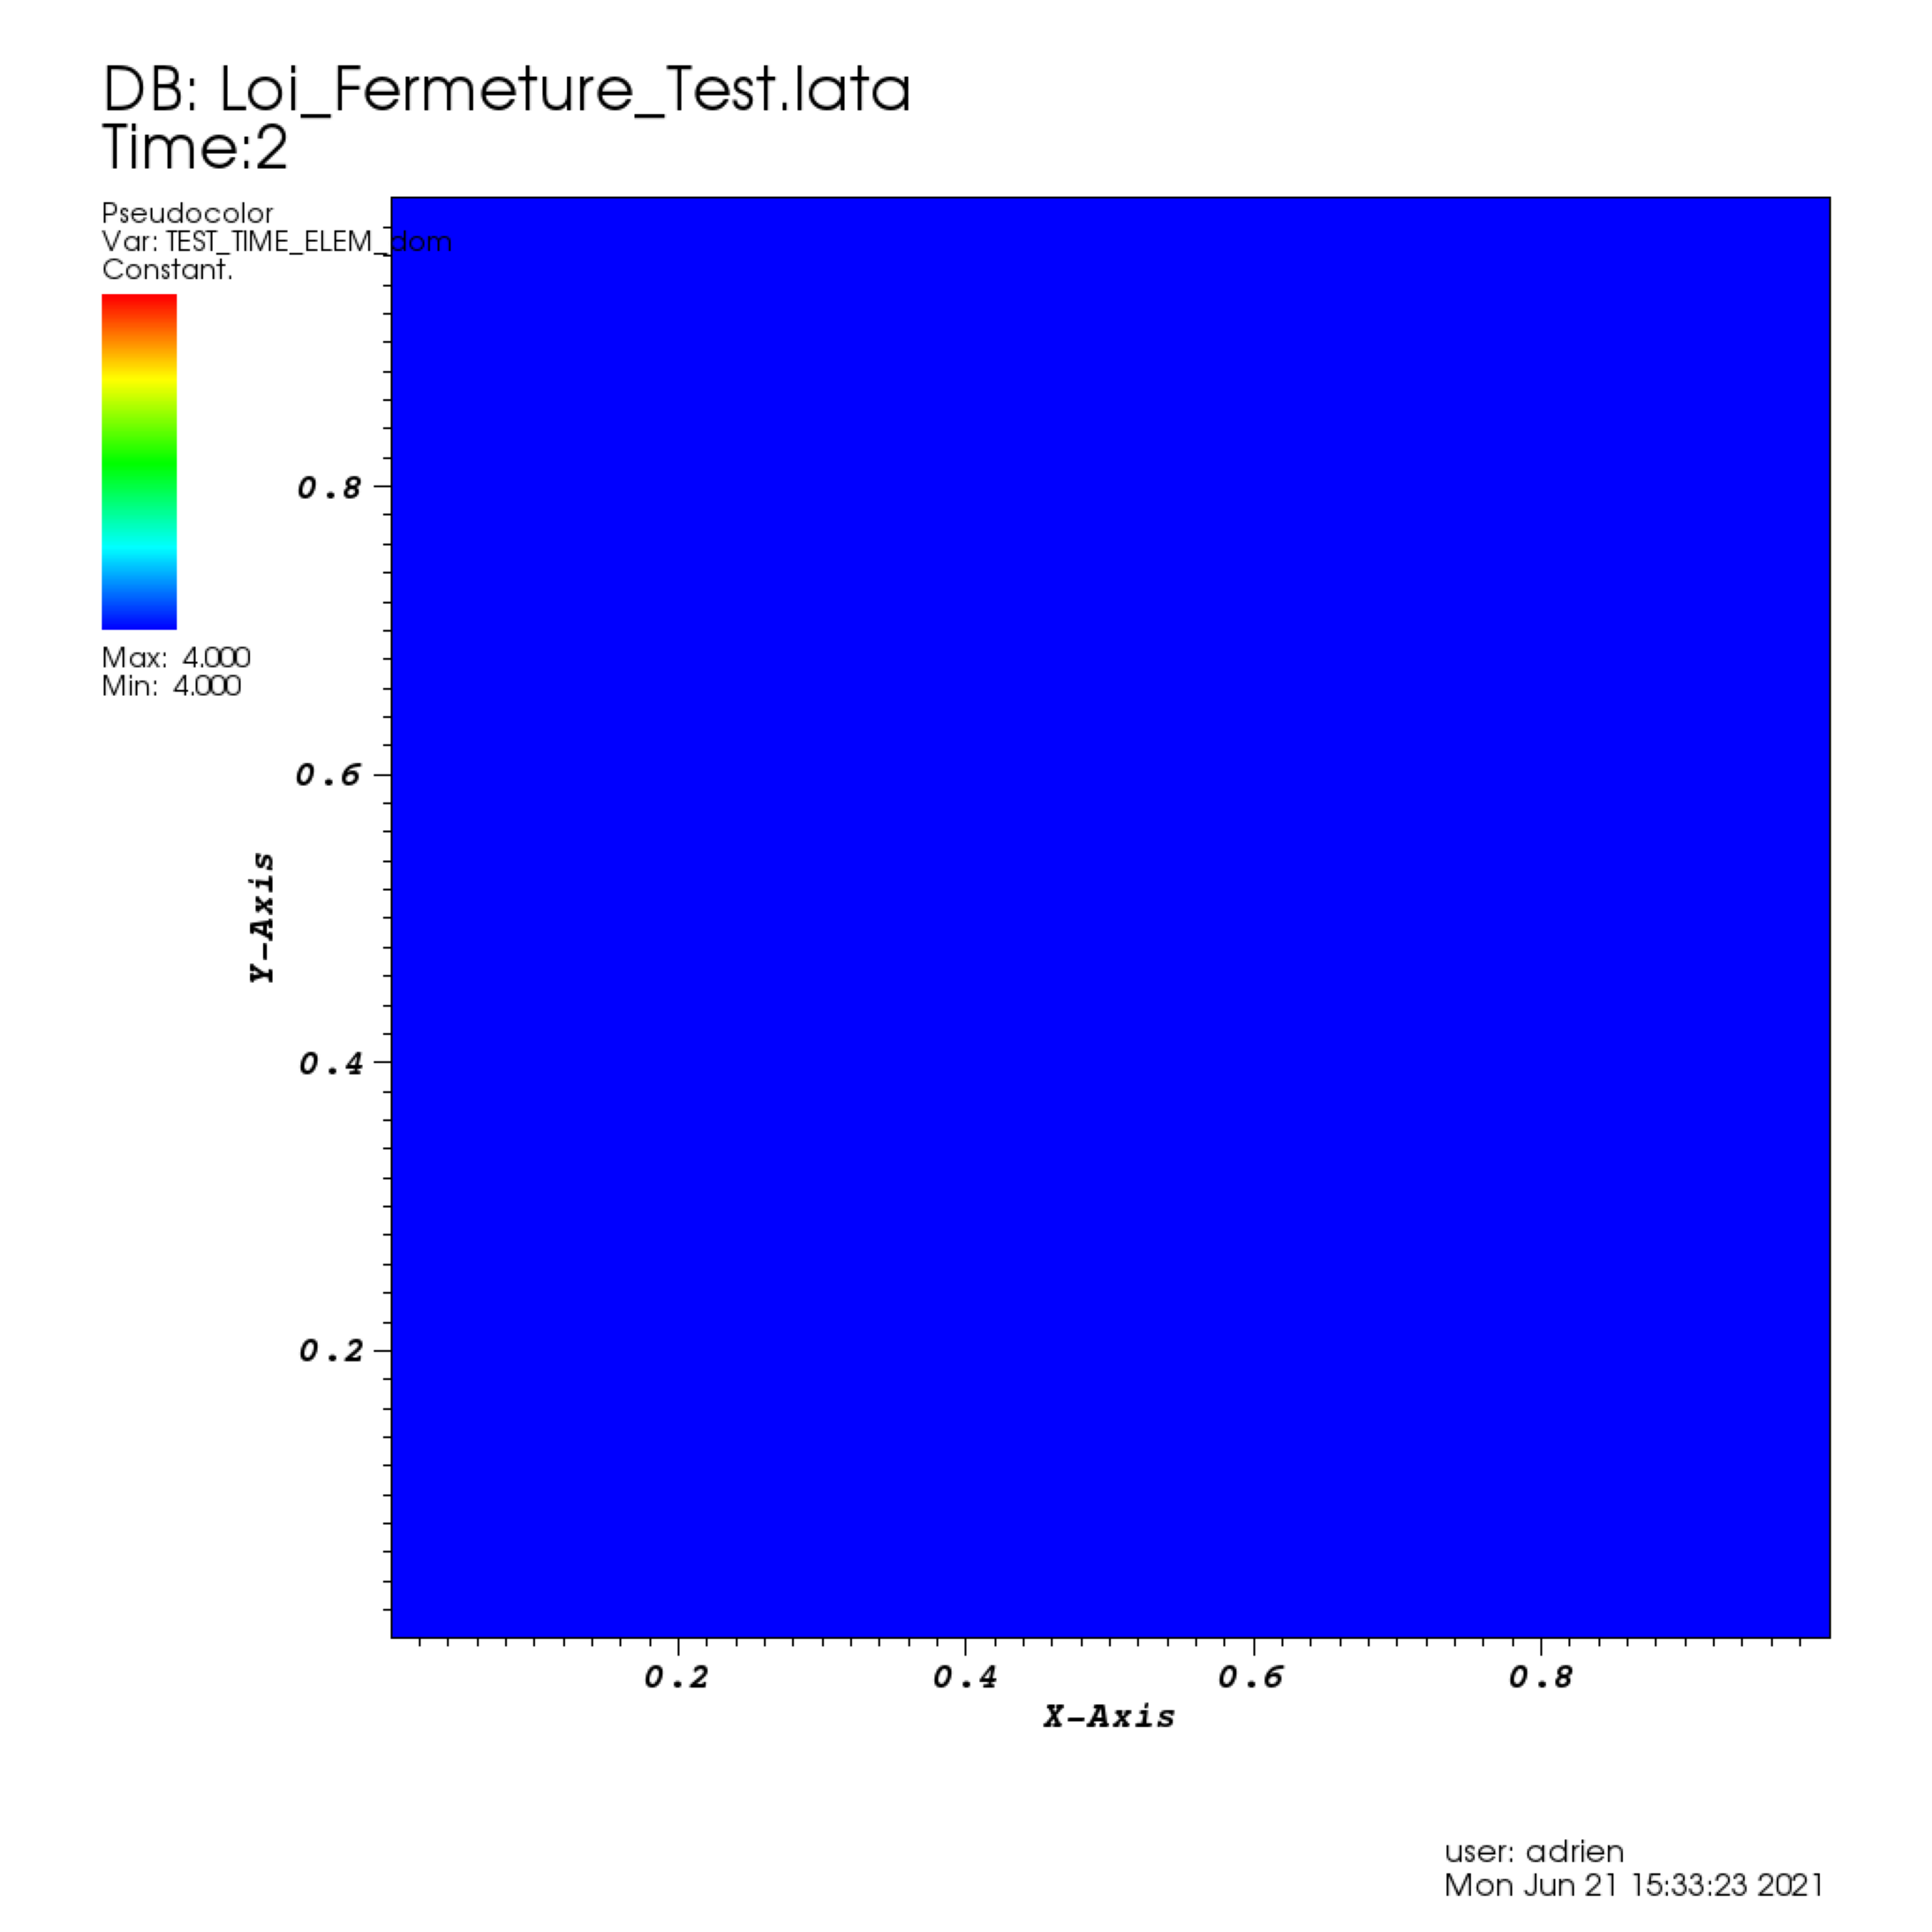

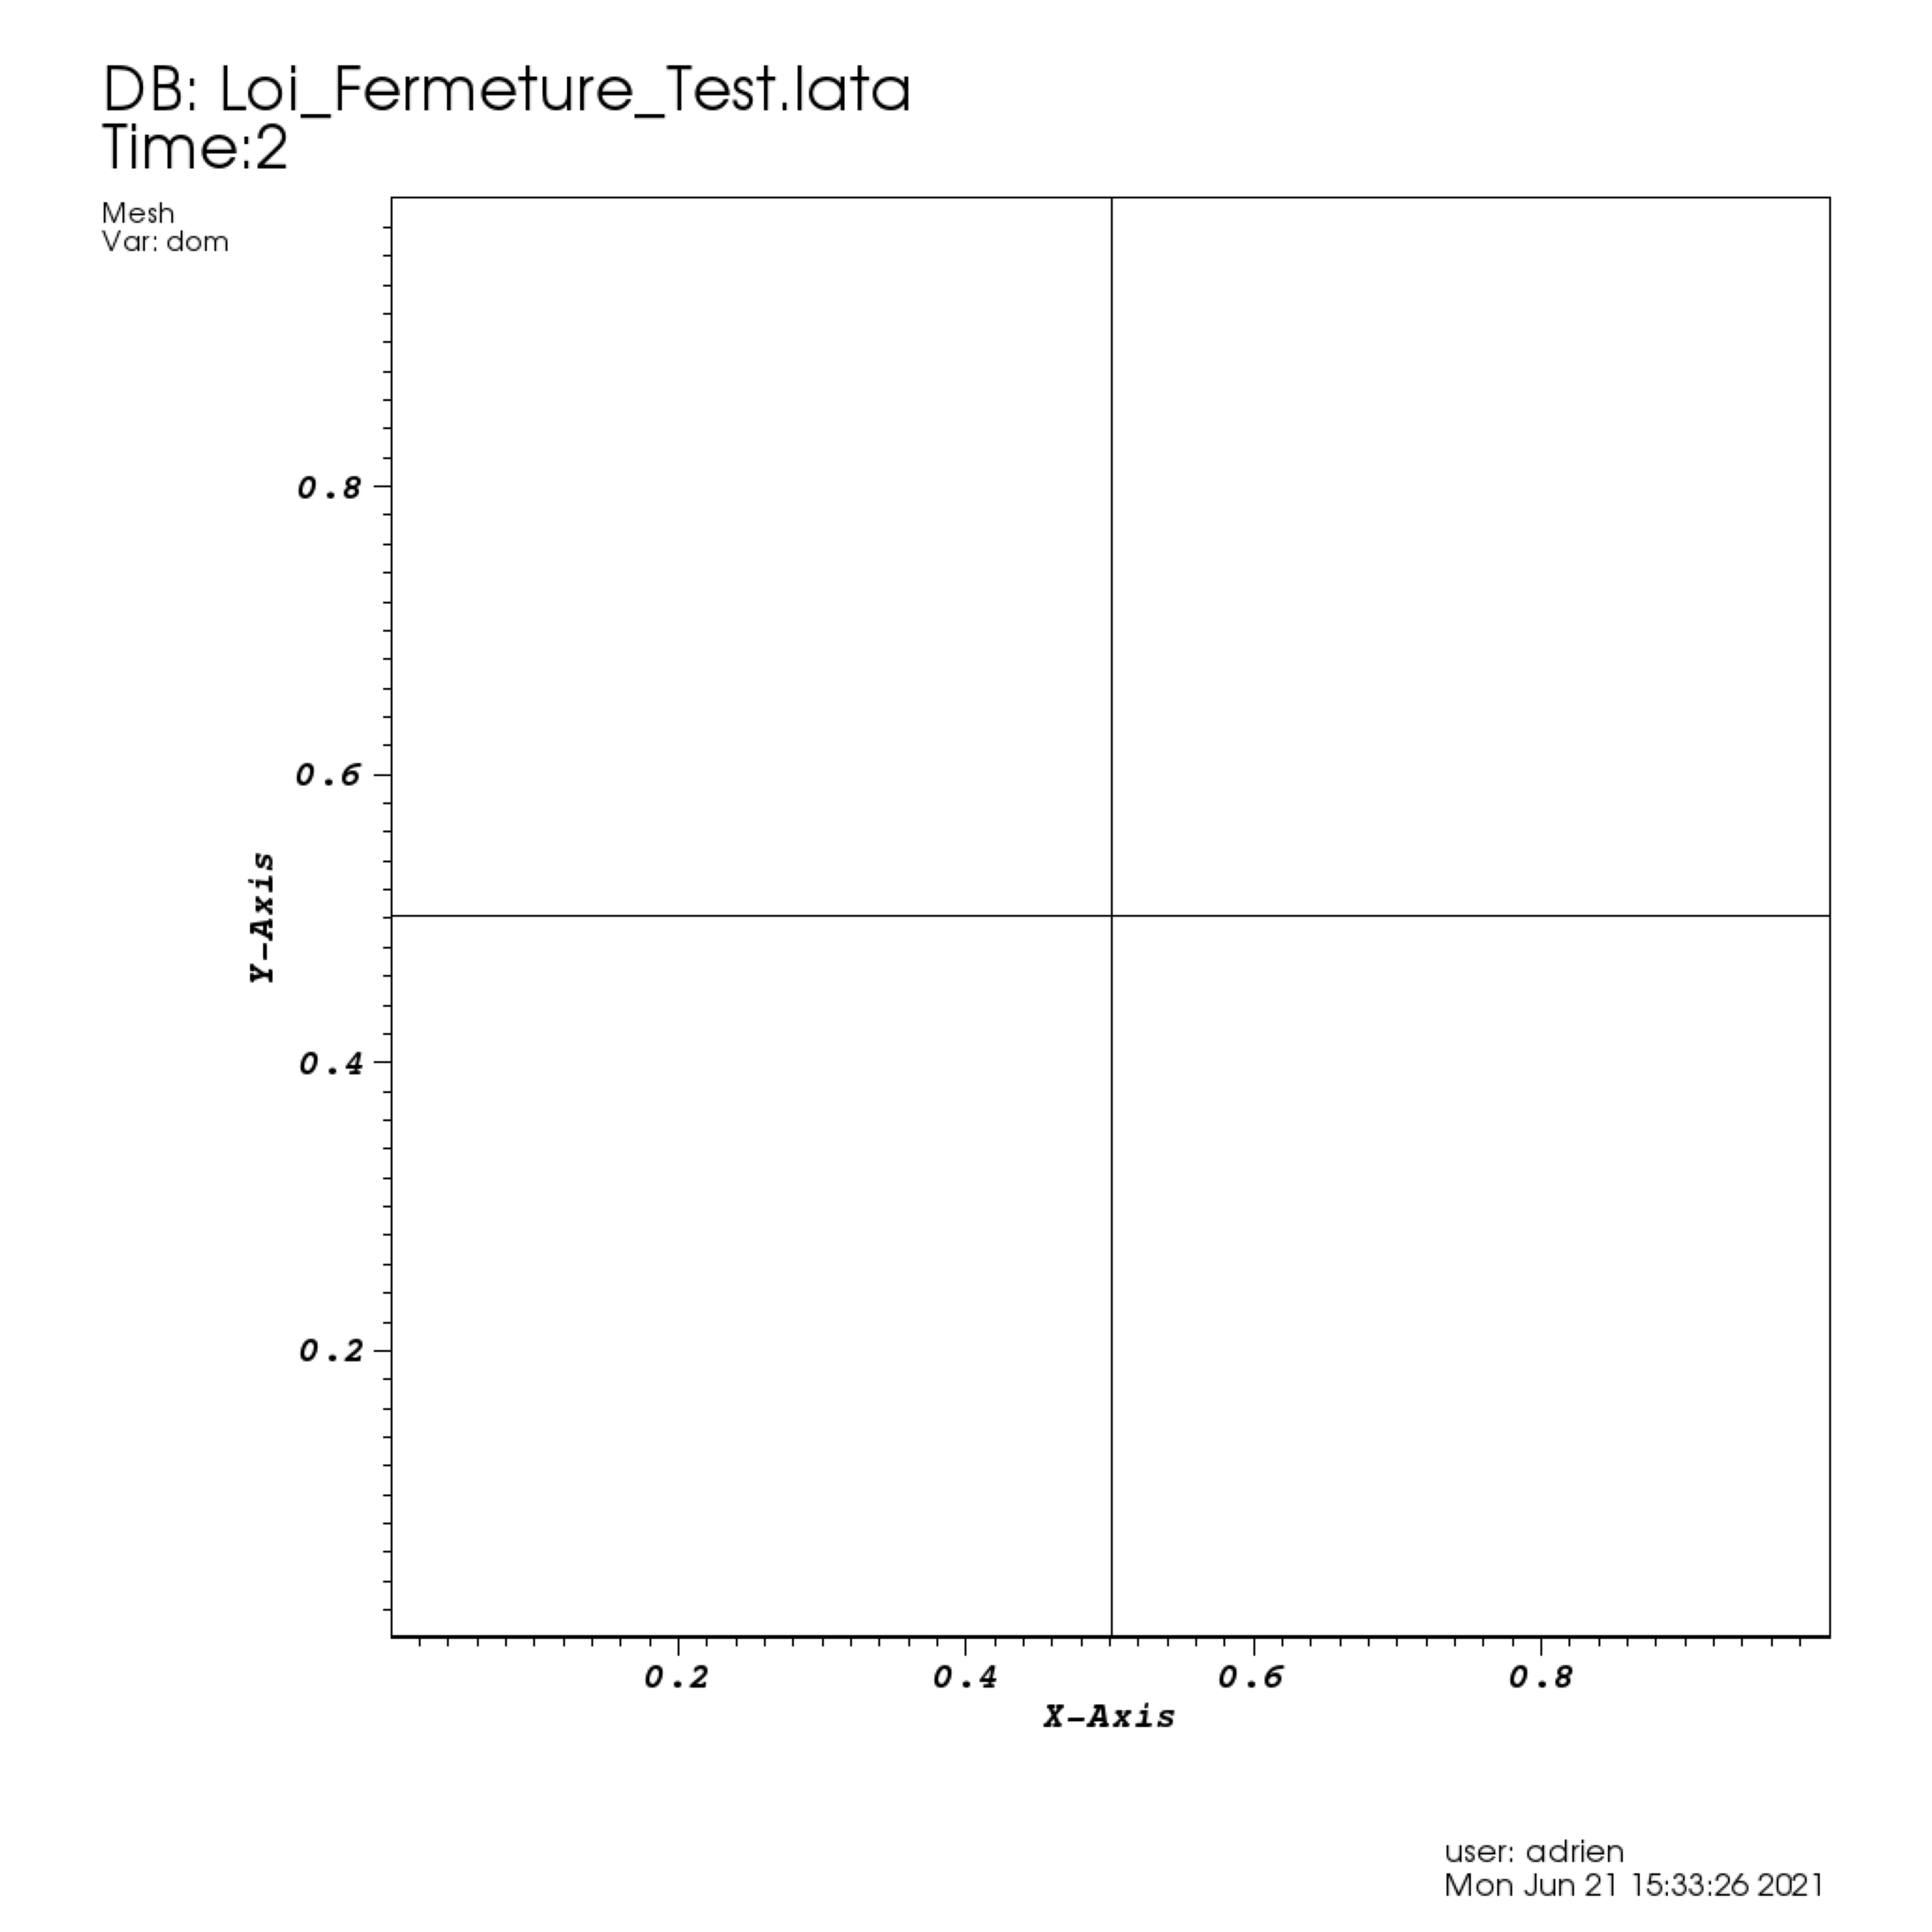

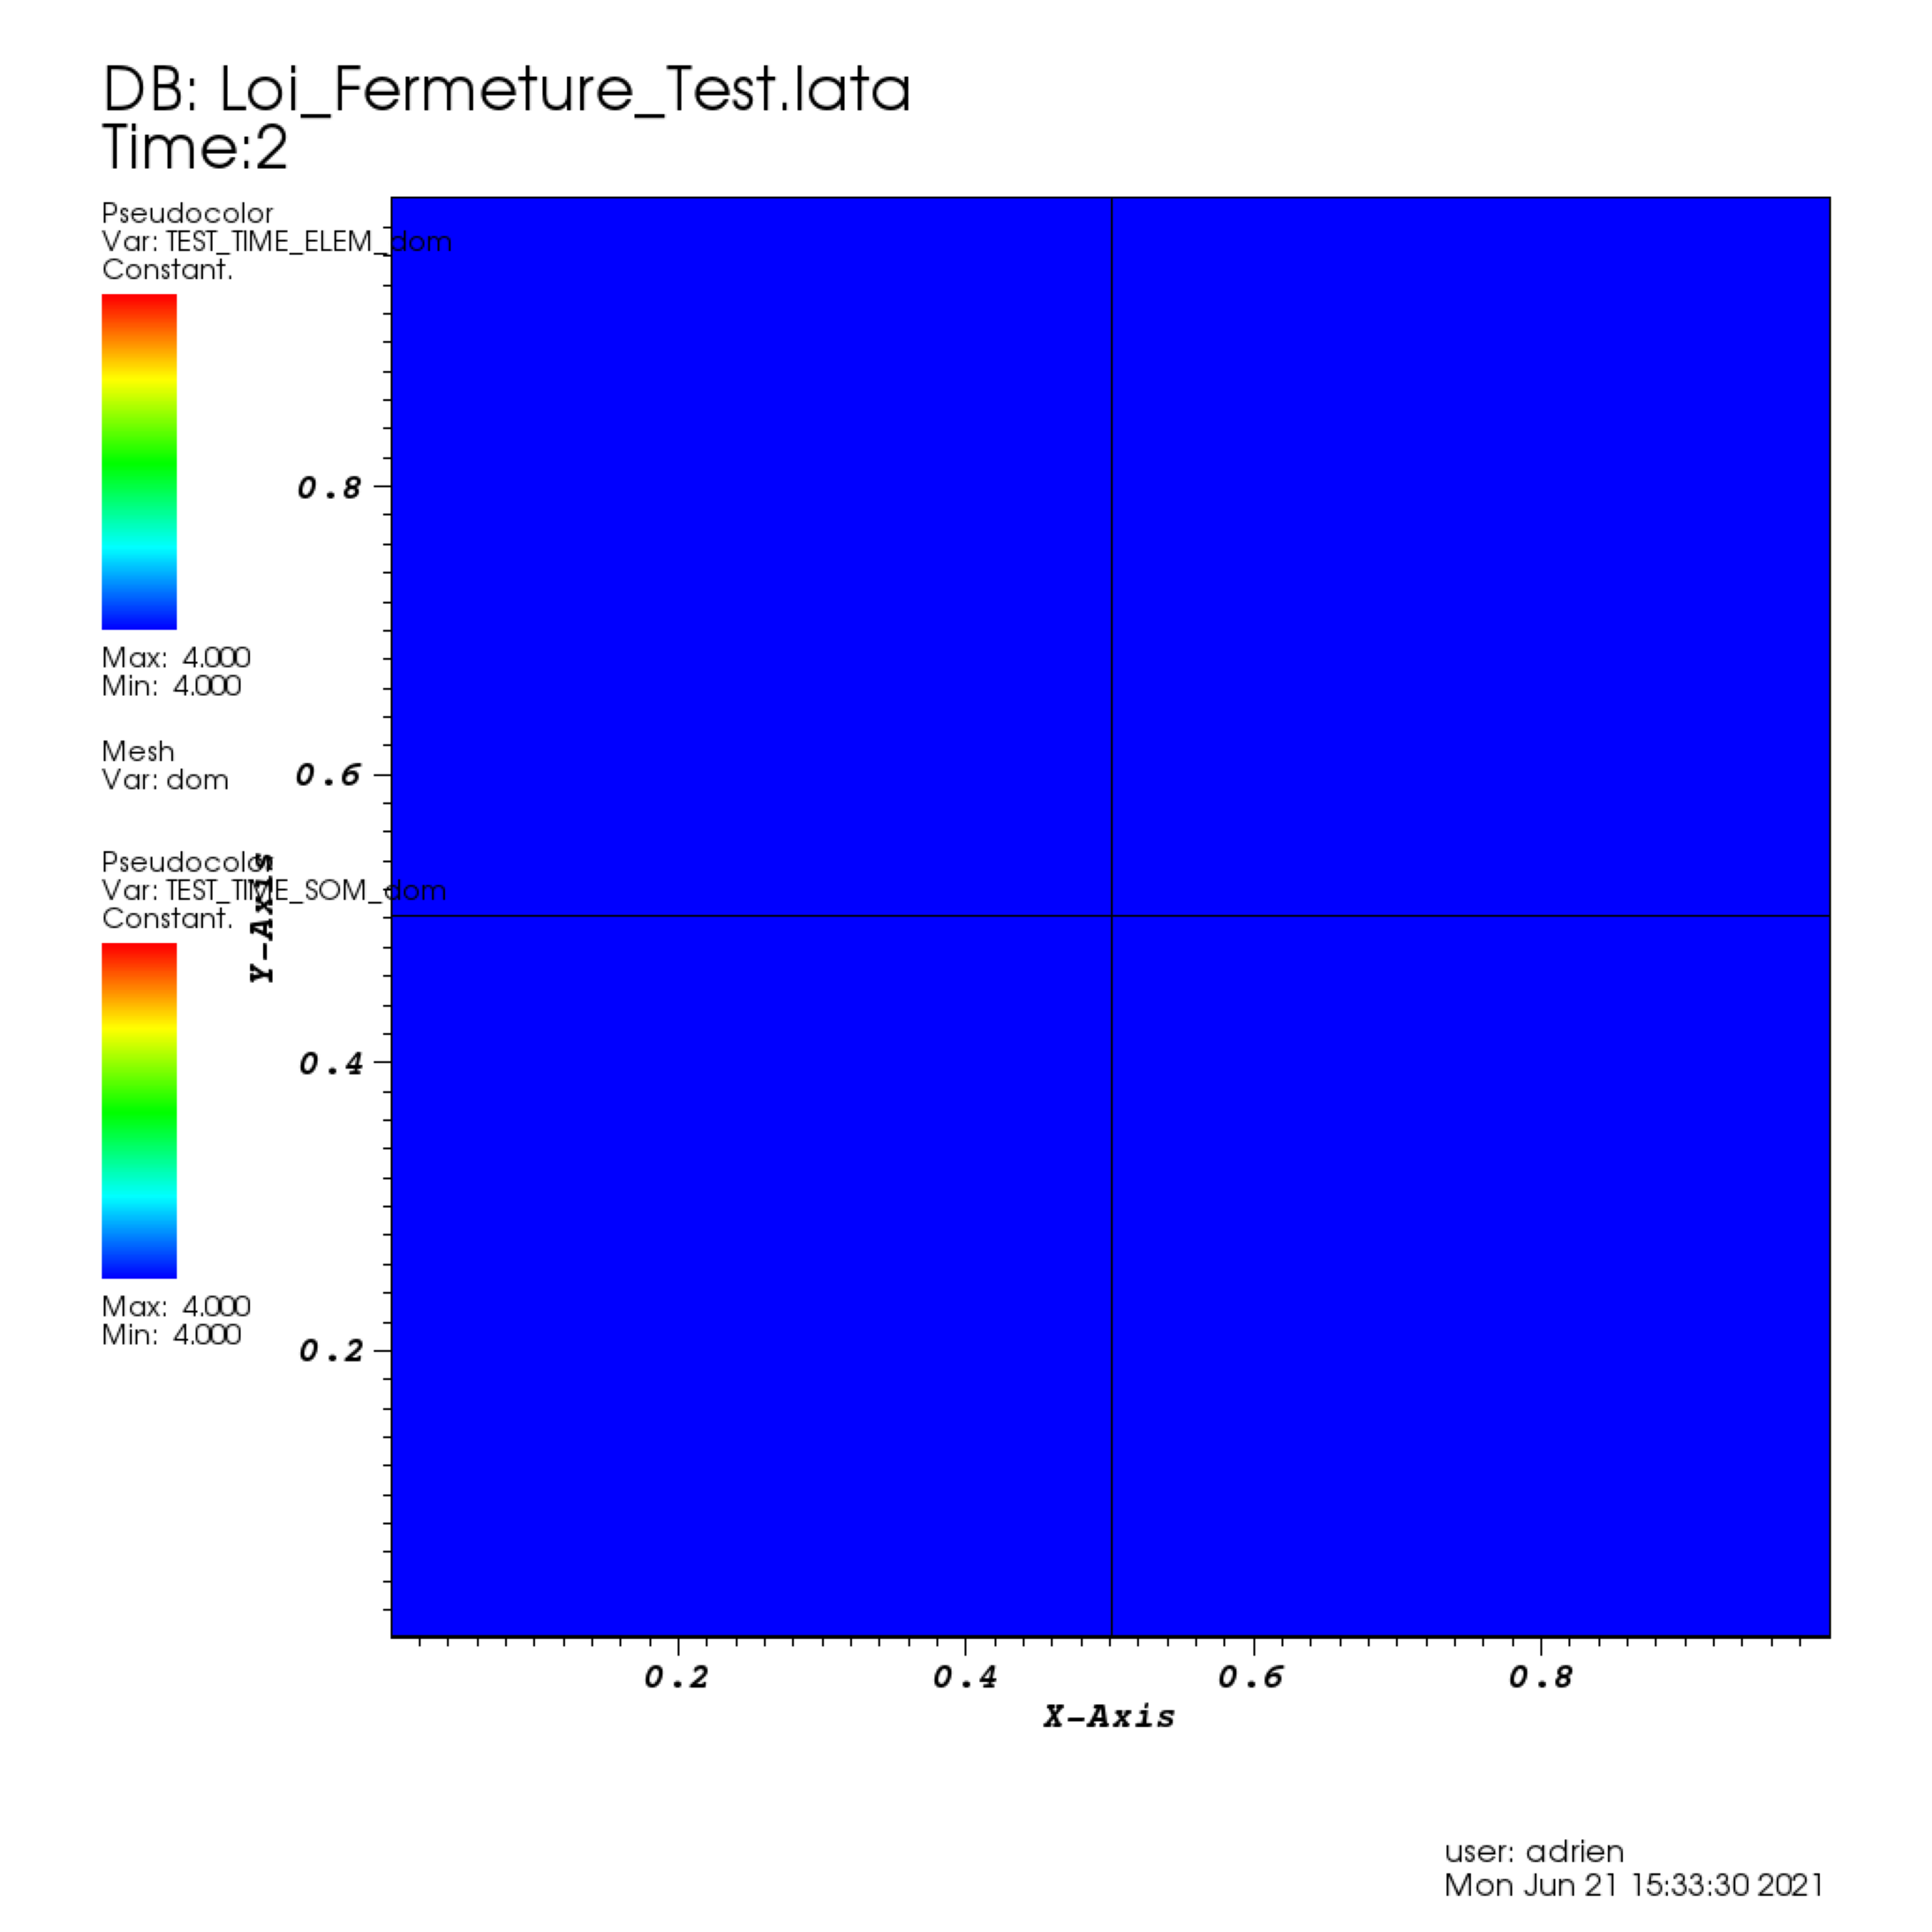

In [9]:
from trustutils.visitutils import tools_for_visit as visit

# Comande simple pour visualiser le champ ou le maillage
visit.showField("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",plotmesh=False)
visit.showMesh("Loi_Fermeture_Test.lata")

Plot=visit.Show("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom")
Plot.addField("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_SOM_dom")
Plot.plot()

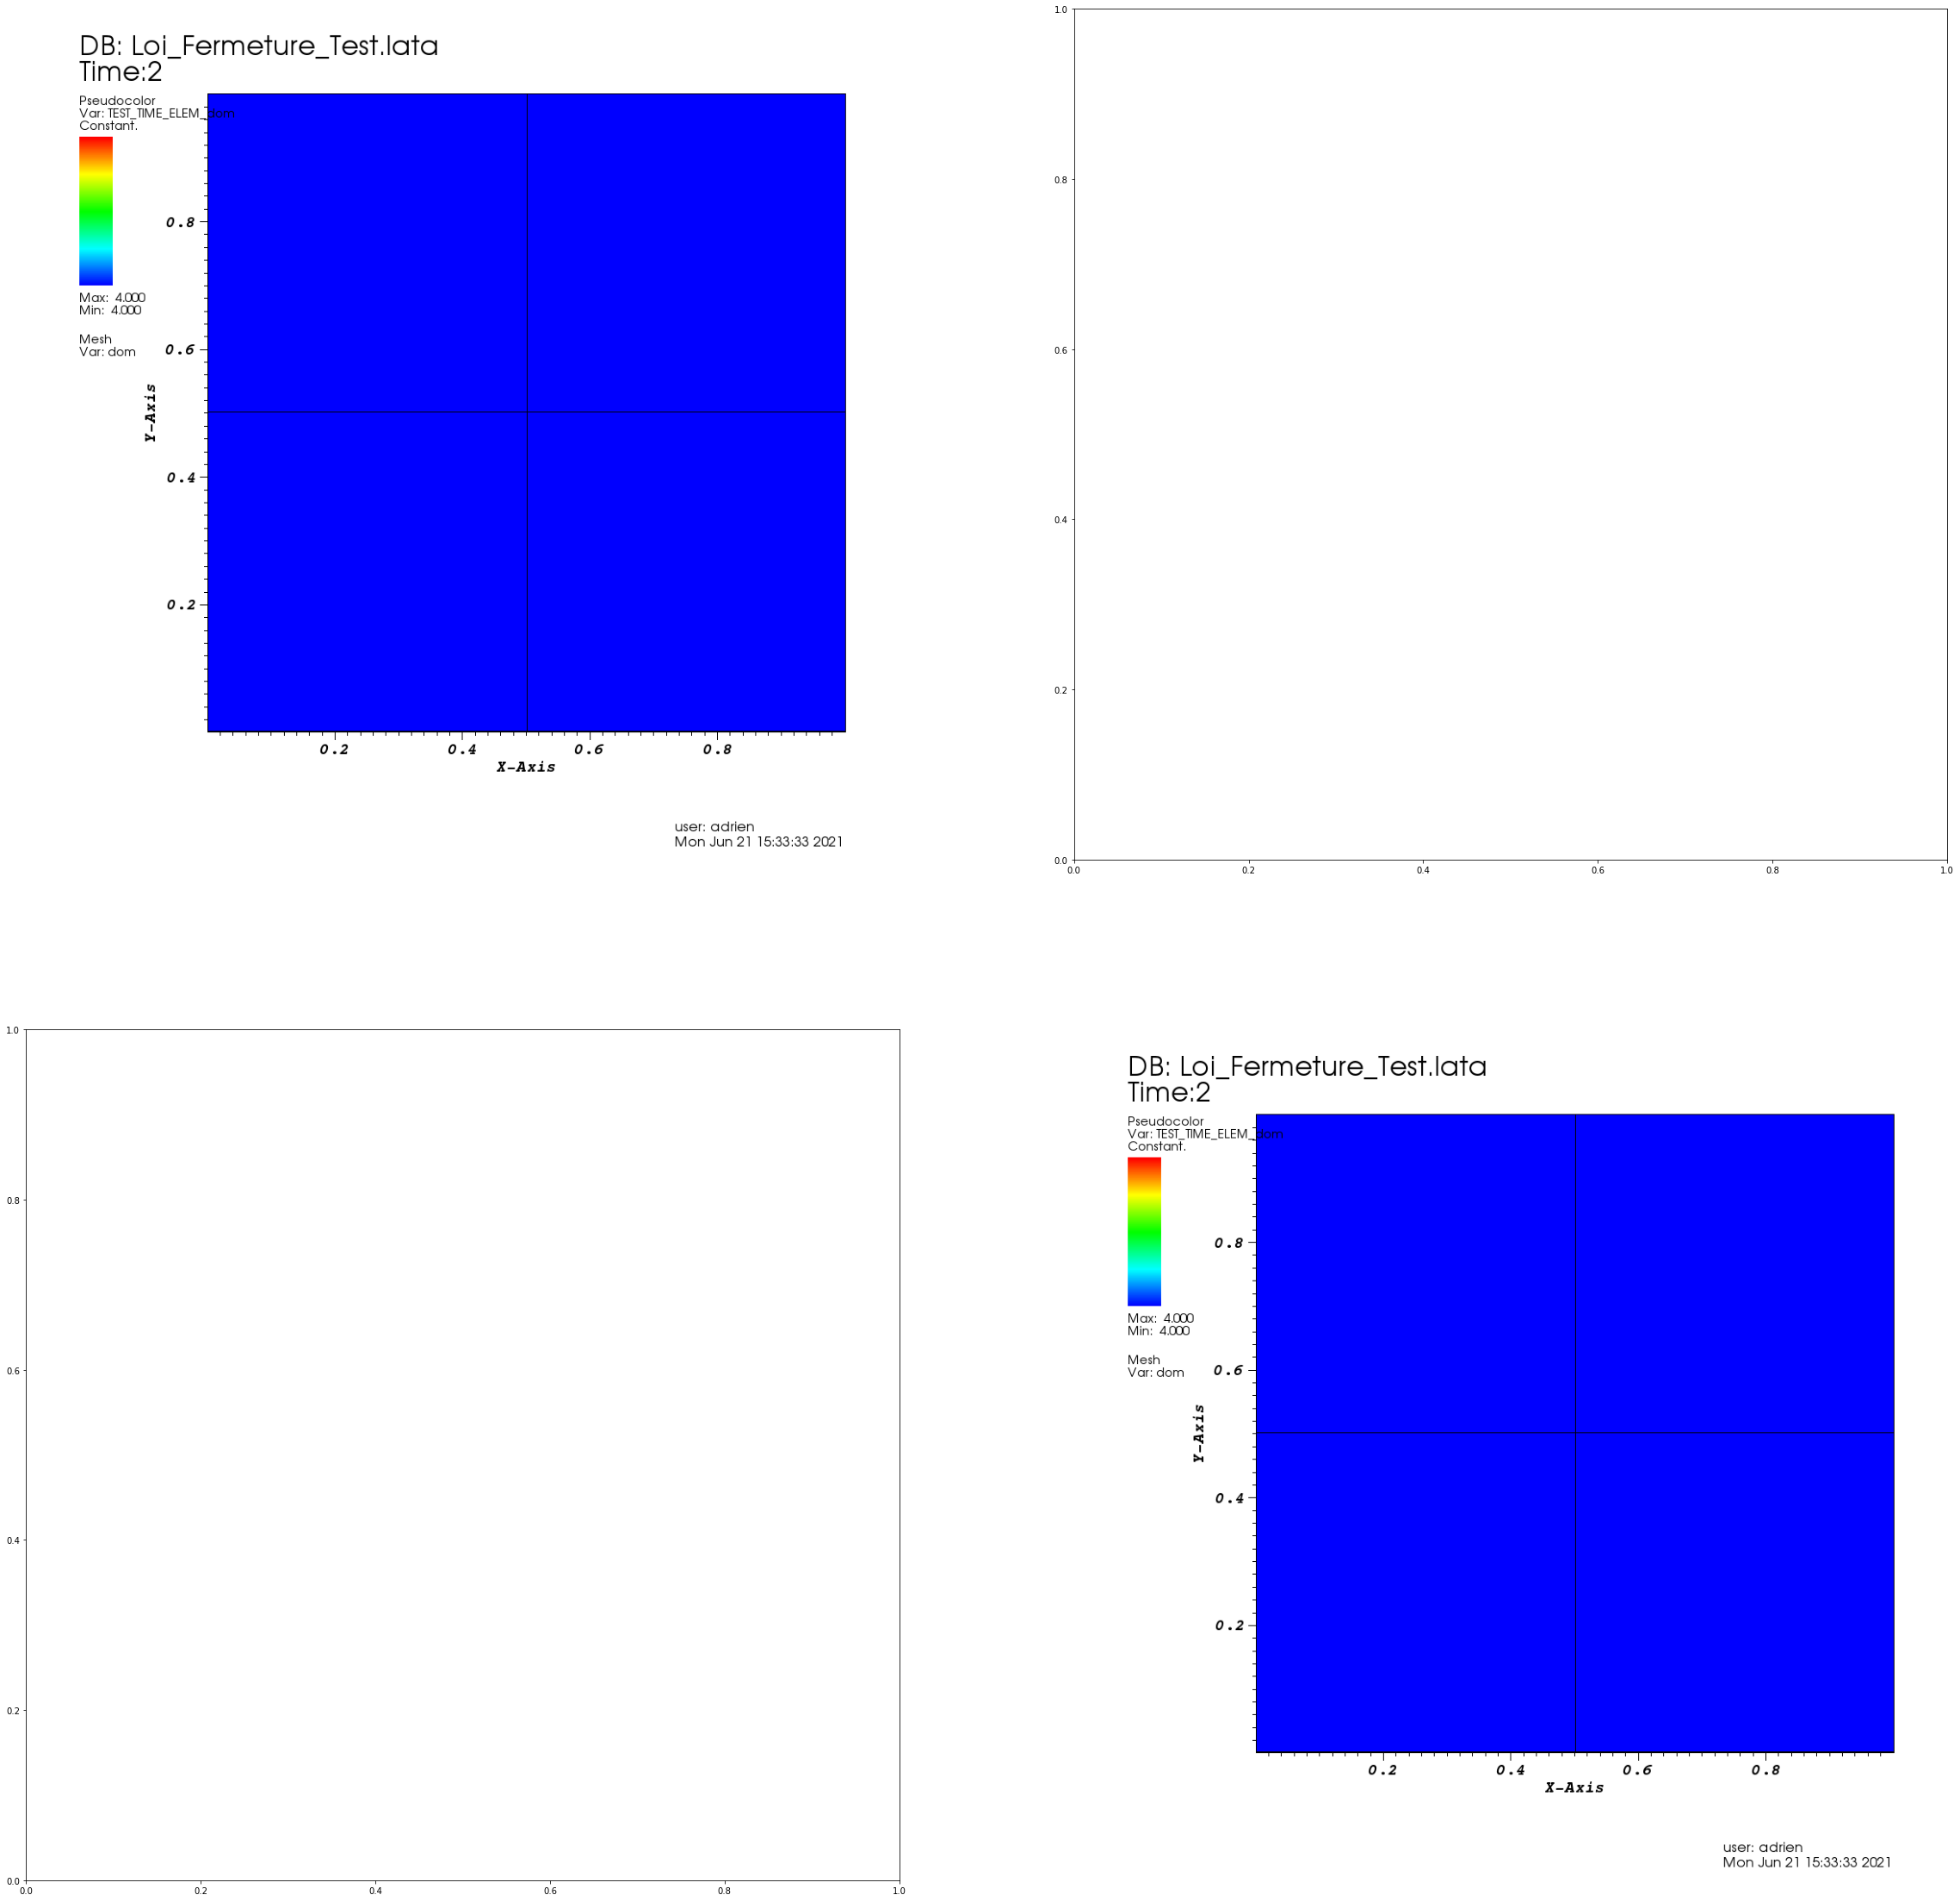

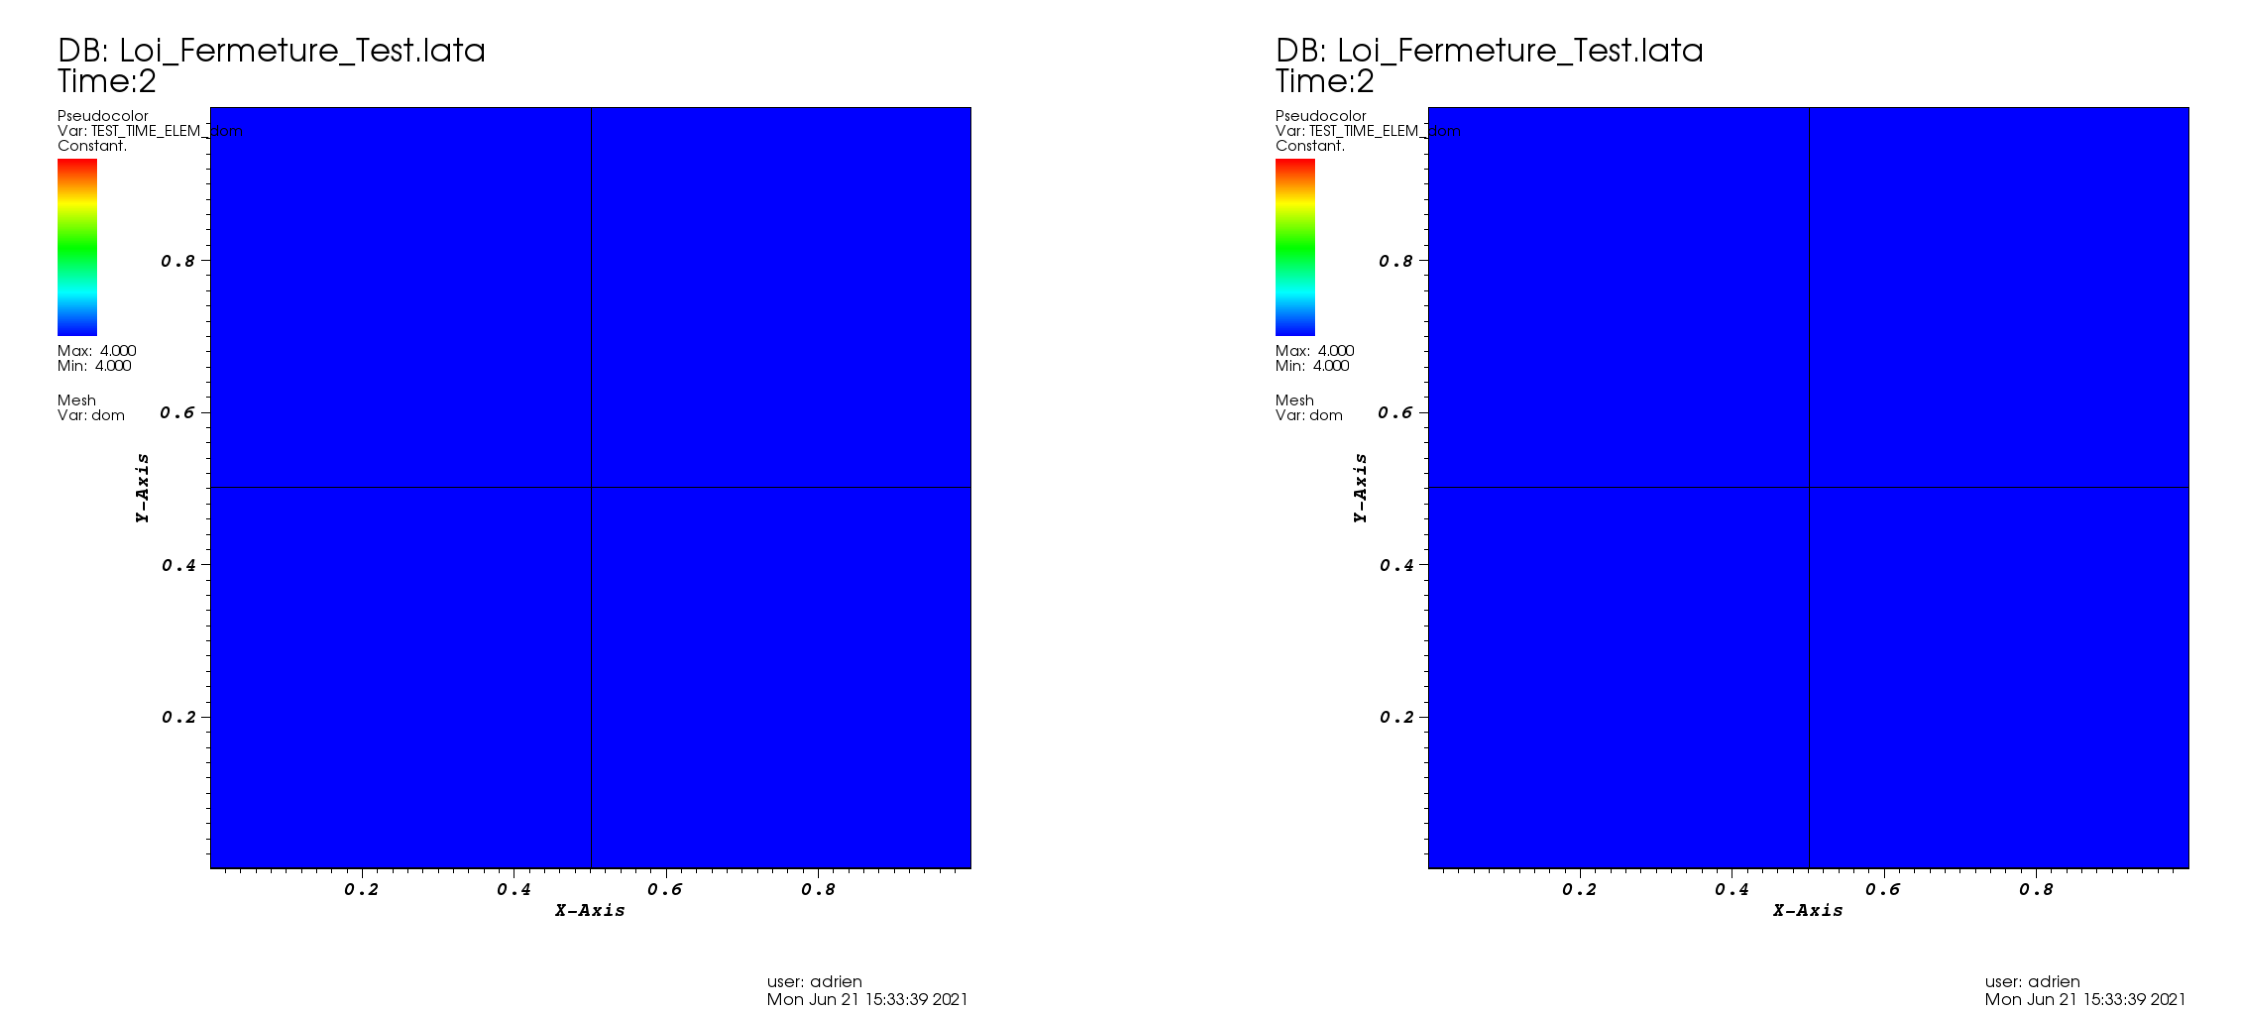

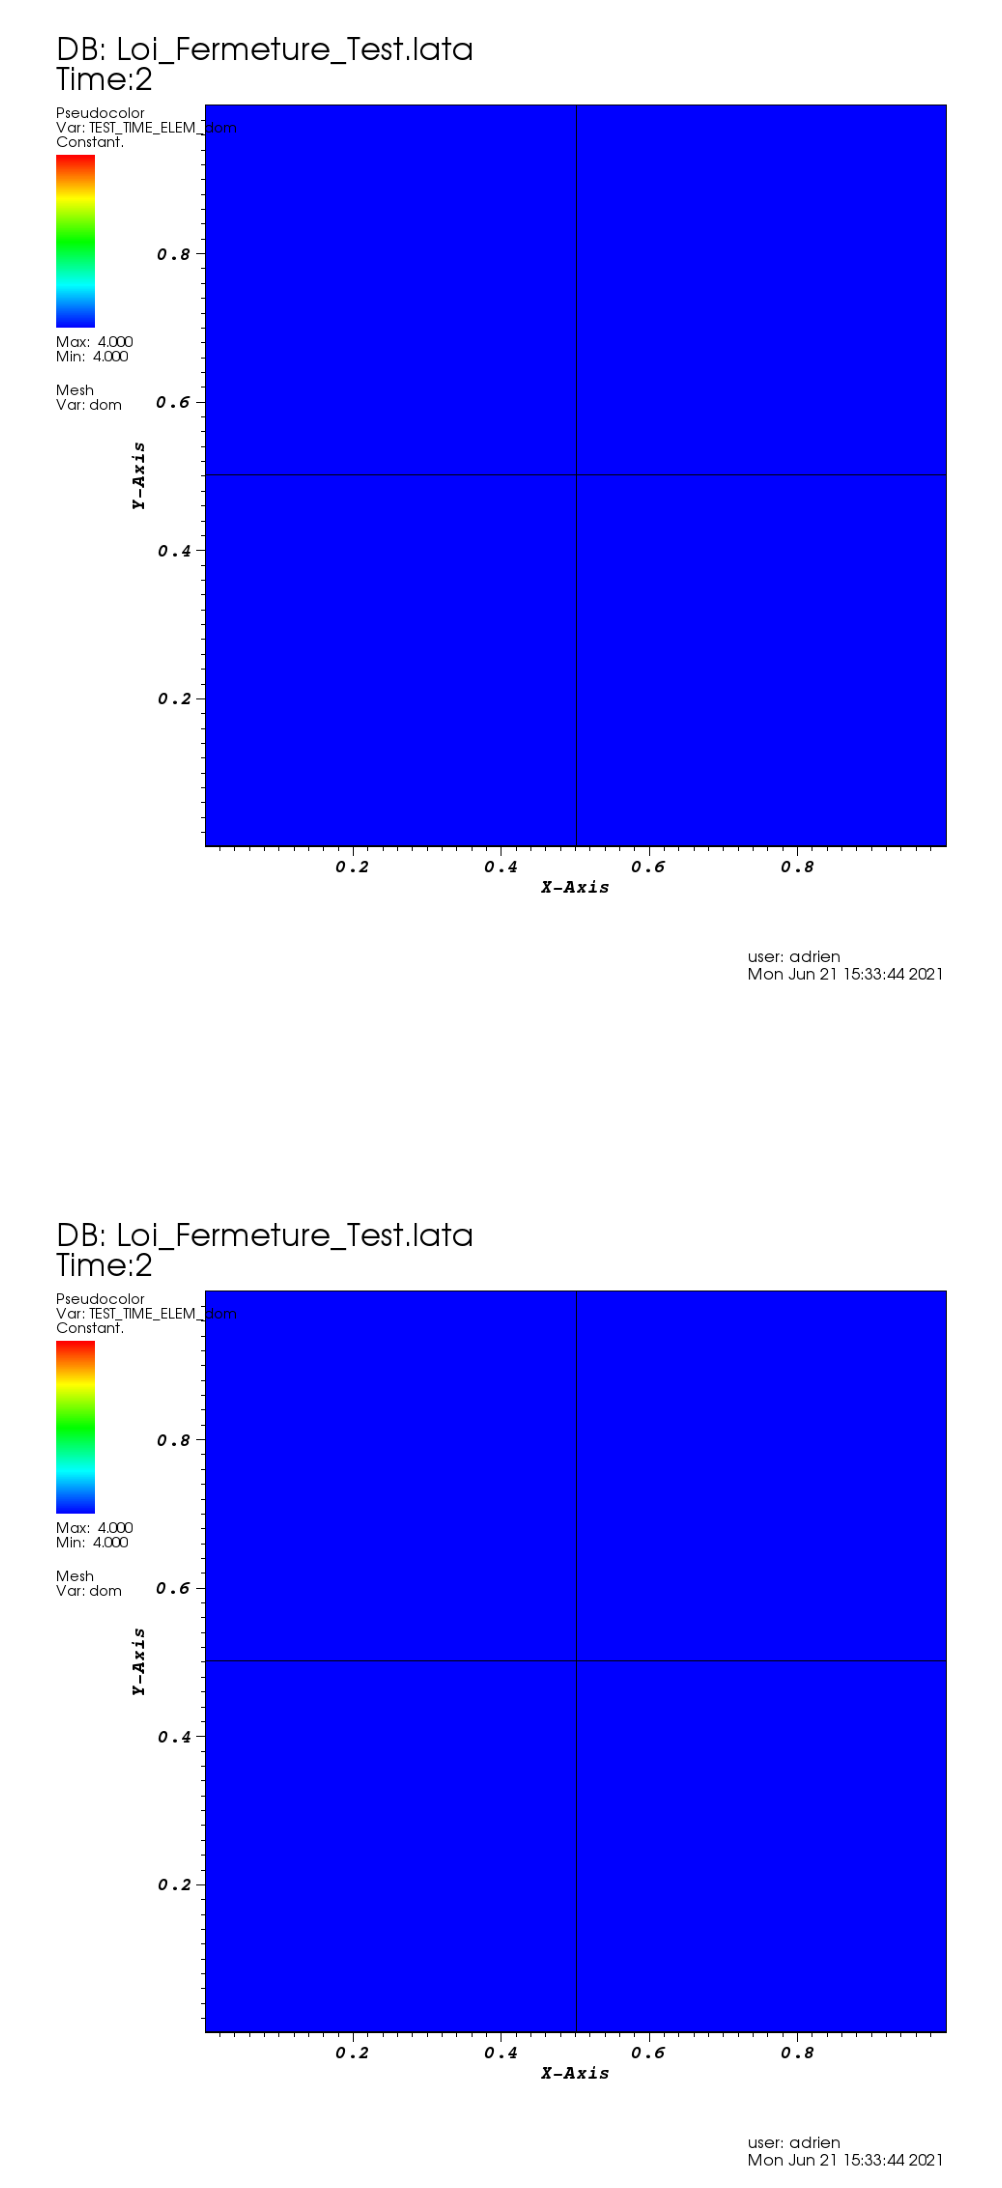

In [10]:
from trustutils.visitutils import tools_for_visit as visit


# Multiplot carré
Plot=visit.Show("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",nY=2,nX=2)
# Remarque: 'addField' ne marche pas dans les multiplot
Plot.addField("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_SOM_dom") 
Plot.add("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",xIndice=1,yIndice=1) 
Plot.plot()

# Multiplot horizontal
Plot=visit.Show("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",nY=1,nX=2)
Plot.add("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",1)
Plot.plot()

# Multiplot vertical
Plot=visit.Show("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",nY=2,nX=1)
Plot.add("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",1)
Plot.plot()